In [ ]:
# importing libraries for data manipulation
import pandas as pd
import numpy as np
# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#1.Loading data set

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Stroke analysis/healthcare-dataset-stroke-data.csv')

#2.Data Assessing

##2.1.Data overview

In [ ]:
# checking the random 5 rows of our dataframe
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1350,60816,Female,82.0,1,0,Yes,Private,Urban,62.46,20.3,formerly smoked,0
3198,59992,Female,63.0,1,0,Yes,Self-employed,Urban,228.20,37.7,never smoked,0
3879,24920,Female,35.0,0,0,Yes,Govt_job,Rural,97.60,44.8,smokes,0
2136,59745,Female,27.0,0,0,Yes,Private,Urban,76.74,53.9,Unknown,0
3552,36896,Male,25.0,0,0,Yes,Private,Rural,66.51,29.2,Unknown,0


**Features Explanation**
- 1) `id` unique identifier for each patient
- 2) `gender` Male, Female or "Other"
- 3) `age` age of the respective patient in years.
- 4) `hypertension` 0 if our patient doesn't have hypertension case, 1 if our patient has hypertension case.
- 5) `heart_disease` 0 if our patient doesn't have any heart disease case, 1 if our patient has a heart disease case.
- 6) `ever_married` No or Yes representing the marital status of patient.
- 7) `work_type` "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) `Residence_type` "Rural" or "Urban" where our respective patient lives.
- 9) `avg_glucose_level` average glucose level in blood of our patient. (mg/dl)
- 10) `bmi` body mass index
- 11) `smoking_status` "formerly smoked", "never smoked", "smokes" or "Unknown" Here the term Unknown means that this particualr information is unavailable for this patient
- 12) `stroke` 1 if our patient had a stroke or 0 if not the case.

##2.2.To check size of data

In [ ]:
# To check the number of rows and columns present in our dataframe
df.shape

(5110, 12)

##2.3.To check datatypes

In [ ]:
# getting information about the data present in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##2.4.To check missing values

In [ ]:
# checking for the missing values in terms of percentages
df.isna().sum()/ len(df)* 100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


##2.5.To check missing values

In [ ]:
# checking for the duplicate rows present in our dataframe
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


##2.6.Checking uniques values in categorical features

In [ ]:
# Obtaining the names of object and numerical columns in lists.
obj_column = [col for col in df.columns if df[col].dtype == "object"]
num_column = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

In [ ]:
# These are all the object(string)columns present in our dataframe
df[obj_column].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
# These are all the numerical columns present in our dataframe
df[num_column].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [ ]:
# Checking the unique values in columns with object data type.
for col in obj_column:
    unique_values = df[col].unique()
    unique_values_count = len(unique_values)
    print(f"Number of unique values in column '{col}' are {unique_values_count}")
    print(f"Unique values in column '{col}' are: {unique_values}")
    print()

Number of unique values in column 'gender' are 3
Unique values in column 'gender' are: ['Male' 'Female' 'Other']

Number of unique values in column 'ever_married' are 2
Unique values in column 'ever_married' are: ['Yes' 'No']

Number of unique values in column 'work_type' are 5
Unique values in column 'work_type' are: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Number of unique values in column 'Residence_type' are 2
Unique values in column 'Residence_type' are: ['Urban' 'Rural']

Number of unique values in column 'smoking_status' are 4
Unique values in column 'smoking_status' are: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']



##2.7.To check the outliers in data

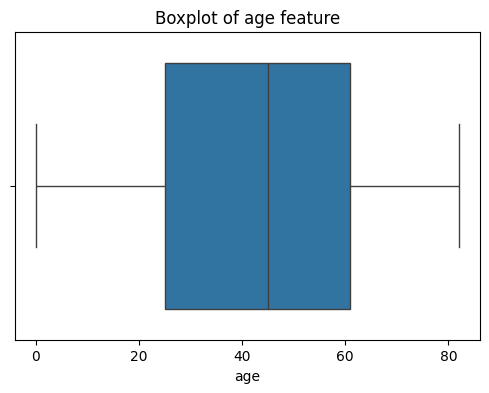

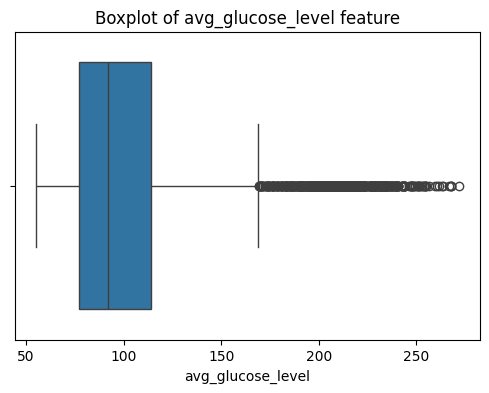

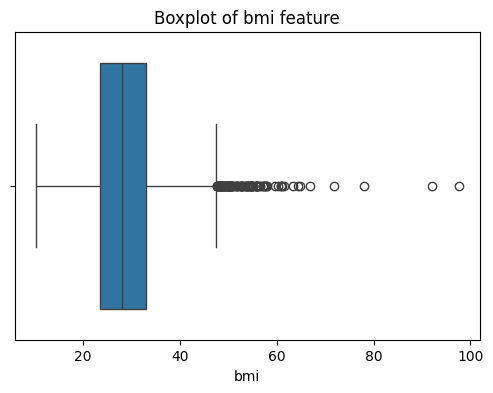

In [ ]:
cont_variable = ["age","avg_glucose_level","bmi"]
for col in cont_variable:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=col,data=df[[col]].dropna())
  plt.title("Boxplot of {} feature".format(col))
  plt.show()

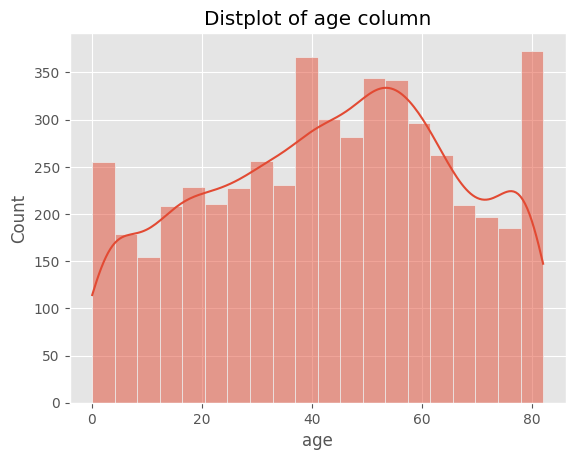

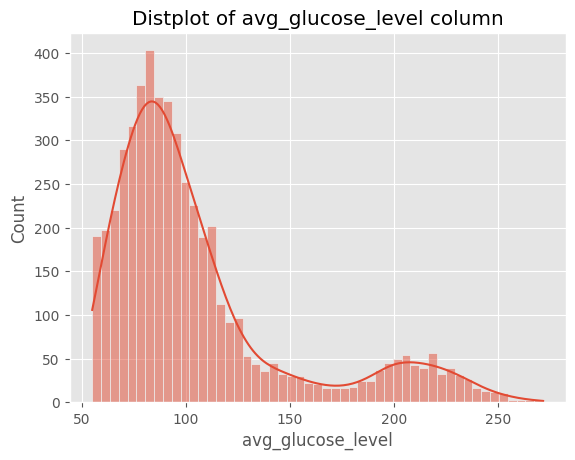

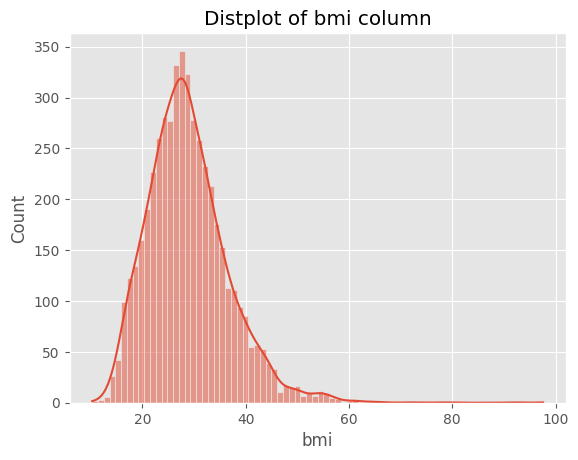

In [ ]:
# Creating distplots for numerial features to understand their distribution
plt.style.use("ggplot")
for col in cont_variable:
    sns.histplot(df[col],kde=True)
    plt.title("Distplot of {} column".format(col))
    plt.show()

##2.8.To check summary statistics

In [ ]:
# getting basic summary statistics for our numerical features
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##2.9.Initial Findings from data assessing
- This dataset contains 5110 rows representing each patient information under study and 11 input features and 1 target feature named `stroke`

- The datatypes of all the features are correct except I can furthur convert the `age` datatype from float to integer. But even without changing this results remain the same. I deal with this in data cleaning step.

- Only one feature has missing values present named `bmi`. The percentage of missing value is less than 5%, exactly stands at 3.93%. So we can simply remove these rows from the data set. It will not create any impact on the insights

- No duplicate values were identified in the dataset.

- **Findings from outliers visualizations**:From boxplot and histogram I can conclude that `age` is almost normally distributed and does not contain any outlier as I can expect in the case of age.The `avg_gulucose_level` and `bmi` both features are right skewed representing a large number of outliers but in the maximum values range.I do not need to remove the outliers as they represent the significant data.It is very common to have a very large values of gulucose levels and bmi in the diabetic and obese patients as compared to the normal individuals so there is no need to remove these datapoints from the original dataframe.

- From our summary satistics study I can conclude that the `age` of our patients are widely distributed with the std of almost 23 years and average of 43 years. Our dataset have patients of almost every age ranging from children of less than 1 year to adults of 82 years.

- The `avg_glucose_level` is also widely distributed as expected with std of almost 45 mg/dl and average of 106. The minimum sugar level recorded was 55(refering to hypoglycemic case in our data) and highest was 271.74 mg/dl(the confirmed diabetic case).

      Normal Fasting Gulucose Level: 70 mg/dl to 100 mg/dl
      Normal Gulucose Level(after eating): 120 mg/dl to 140 mg/dl

- The `bmi` was also widely distributed with std of 7.85 and average of 28.89 referriing to overall obesity present in our patients in the data. The minimum bmi measured was  10.3(extremely under weight) and maximum was 97.6(extremely obese case)
      Normal bmi range: 18.5 to 24.9

- Will understand the distributions of our features visually later on in data analysis part.


#3.Data Cleaning

##3.1.Dealing with missing values

In [ ]:
# Removing the missing values from dataset
df= df.dropna()

# checking for the missing values in terms of percentages
print("The shape of dataframe after removing missing values is",df.shape)
df.isna().sum()/ len(df)* 100

The shape of dataframe after removing missing values is (4909, 12)


,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


**Reason for removing missing values**

- The reason behind the decision of removing the missing rows is that I can remove the mising rows from that if the sum of missing rows is less than 5%(3.933464) as it will not effect the credibility of our data analysis.

##3.2.Changing incorrect data types

In [ ]:
# Converting the data type of the age column from float to integer.
df["age"] = df['age'].astype(int)
# To confirm the datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 498.6+ KB


<ipython-input-16-44f3fa6eef21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df['age'].astype(int)


**Reason for changing incorrect data types**

- As ages values are present in whole numbers thats why it is better to have these values in integers form rather than float.

##3.3.Removing unnecessary features

In [ ]:
# Removing the id column as it is not deemed useful.
df.drop("id",axis=1,inplace=True)
print("The shape of dataframe after removing id column is",df.shape)

The shape of dataframe after removing id column is (4909, 11)




---



---



#4.Data analysis and visualization

##1.Univariate analysis(analysis on singlr variable)

- Numerical variable (box plot,histogram,kde plot)
- Categorical variables (barplot,count plot and pie plot)

##2.Bivariate analysis(analysis on two variables)

- Categorical vs Numerical (box plot, bar plot)
- Categorical Vs Categorical (Stacked bar plot)
- Numerical vs Numerical (scatter plot)

##2.Multivariate analysis(analysis on more than two variables)
- Pair plot
- Heat map

##4.1.Univariate Analysis

###4.1.1.Target variable distribution

In [ ]:
# counts of each unique value in the "stroke" column of DataFrame
df["stroke"].value_counts()

,count
stroke,
0,4700
1,209


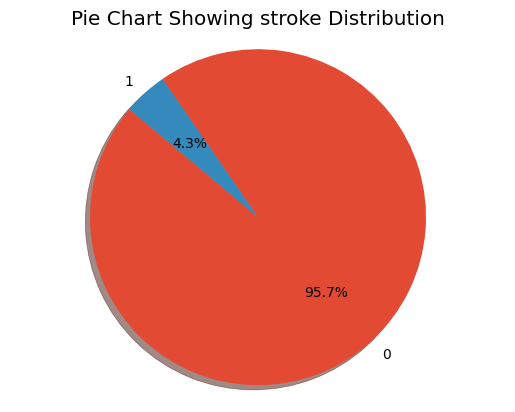

In [ ]:
# I cretae pie chart in terms of percentage to see target class imbalance
all_target_values = df["stroke"].value_counts()
labels = all_target_values.index
values = all_target_values.values
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart Showing stroke Distribution")
plt.show()

###4.1.2.Input Numerical variables univariate analysis

- There is no need to discuss the age,gulucose and bmi(Continous variables) as I have already discussed them in outlier section.

###4.1.3.Input categorical variable univariate analysis

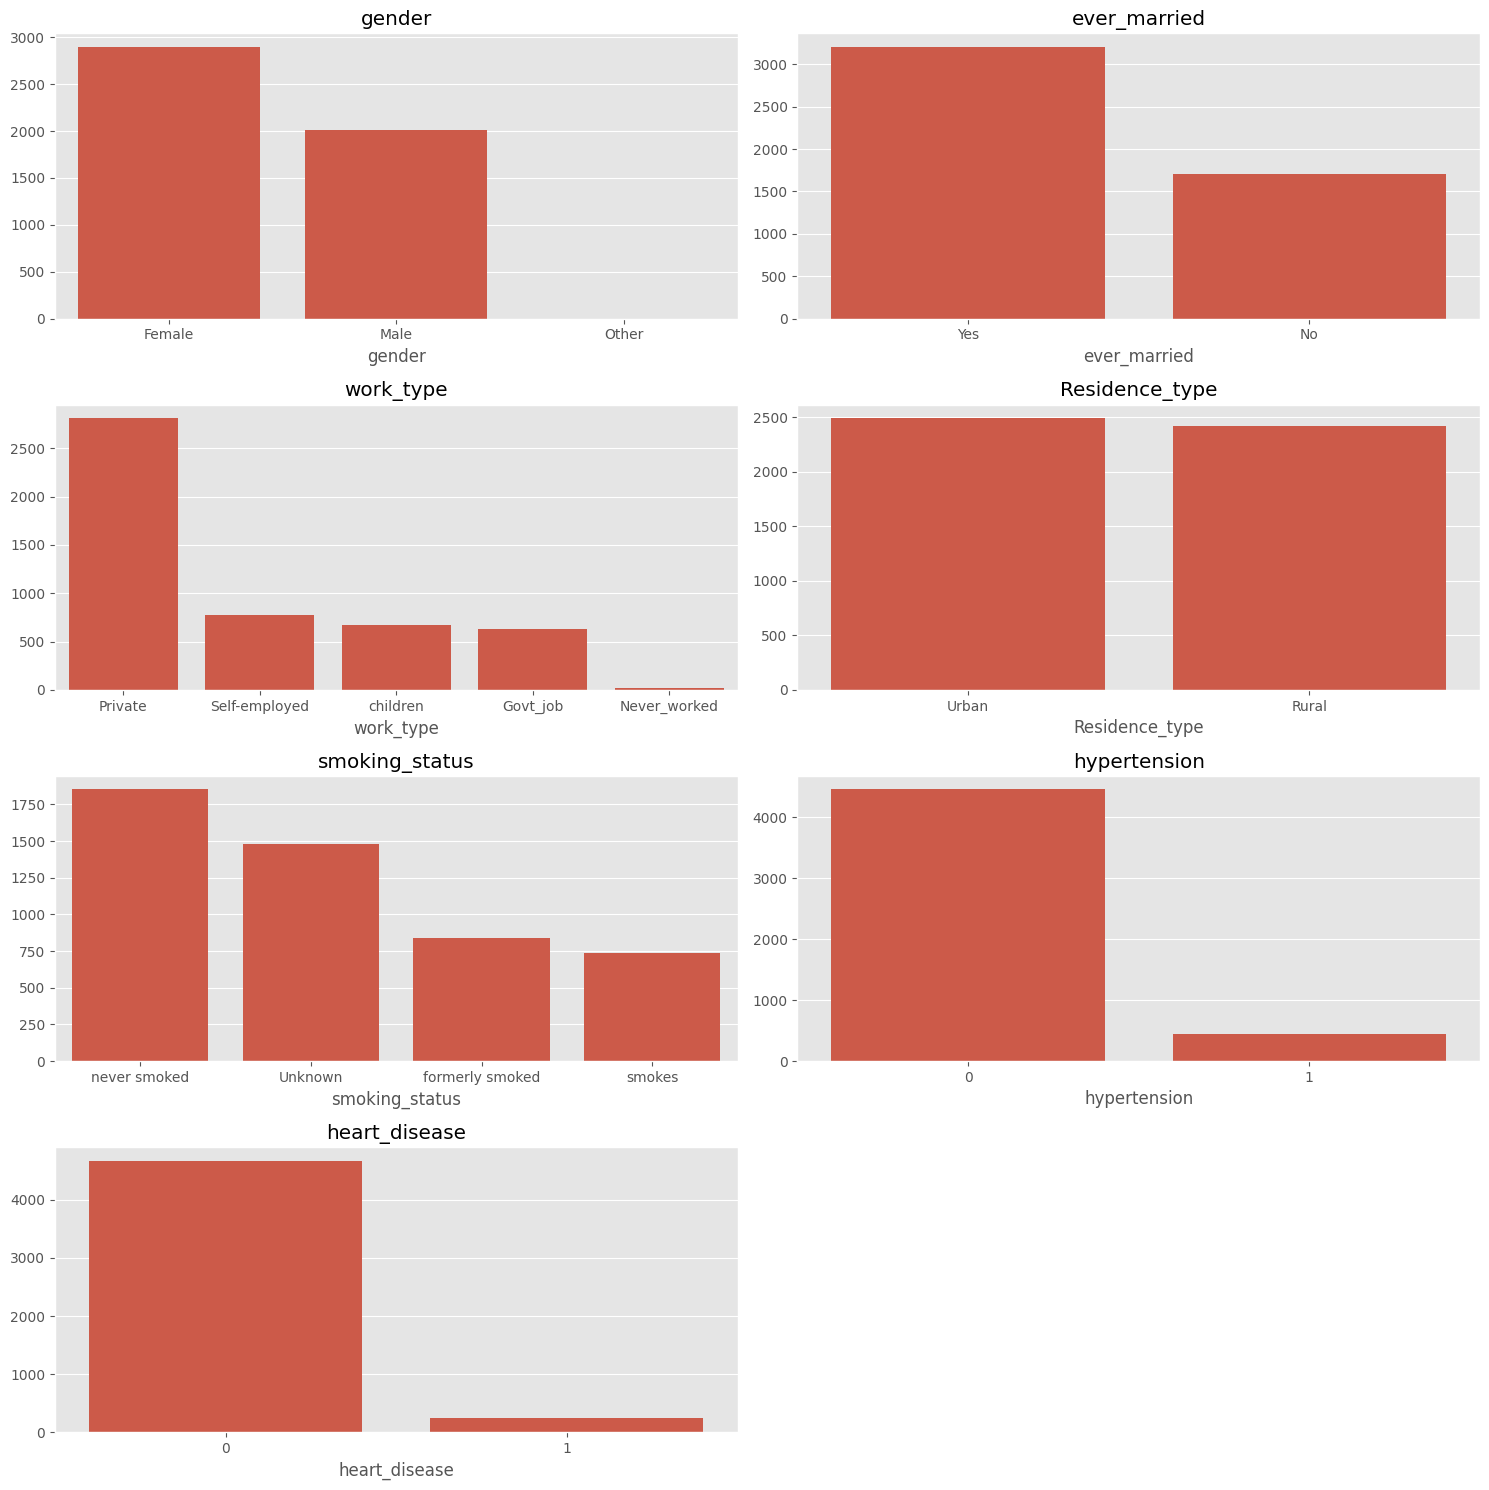

In [ ]:
# Define the categorical variables
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

# Set up subplots for better visualization
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Plotting bar plots for each categorical variable
for var, ax in zip(categorical_vars, axes.flatten()):
    sns.barplot(x=df[var].value_counts().index, y=df[var].value_counts().values, ax=ax)
    ax.set_title(var)

# Hide the empty subplot in the last row and last column
axes[3, 1].axis('off')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

**Findings from univatiate analysis**
- There is a clear case of class imbalance with respect to target variable.
- The Female and married are slightly more as compared to male and single.
- Most of the patients belong to the work_type of Private as compared to other work categories.
- The rural and urban population is almost balanced.
- The individuals having heart disease and hypertension is predominately present in the data as compared to counter category.
- From smoking habbits the non smokers who never smokes are present more as compared to other available categories.

##4.2.Bivariate analysis

###4.2.1.Gender and stroke

In [ ]:
# Calculate the proportion of strokes for each gender for better understanding
gender_proportion = df.groupby('gender')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions for each gender
print("Proportion of the strokes with respect to gender")
display(gender_proportion)

Proportion of the strokes with respect to gender


stroke,0,1
gender,,
Female,0.958578,0.041422
Male,0.955743,0.044257
Other,1.000000,NaN


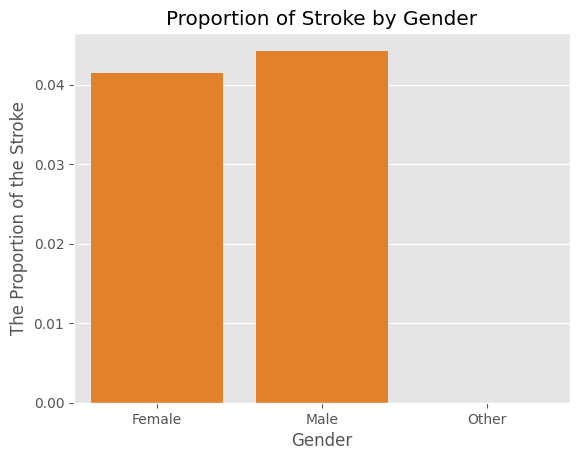

In [ ]:
# I create a bar plot for Stroke and Gender proportions
sns.barplot(x='gender', y=1, data=gender_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('Gender')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by Gender')
plt.show()

###4.2.2.Hypertension vs Stroke

In [ ]:
# Calculate the proportion of strokes for each hypertension for better understanding
hypertension_proportion = df.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to hypertension
print("Proportion of the strokes with respect to hypertension")
display(hypertension_proportion)

Proportion of the strokes with respect to hypertension


stroke,0,1
hypertension,,
0,0.966577,0.033423
1,0.866962,0.133038


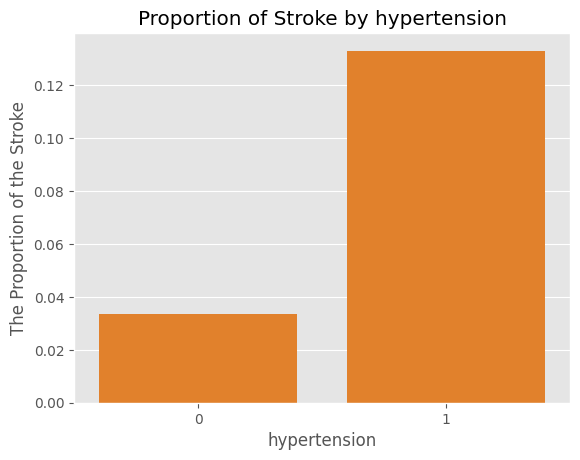

In [ ]:
# I create a bar plot for Stroke and hypertension proportions
sns.barplot(x='hypertension', y=1, data=hypertension_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('hypertension')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by hypertension')
plt.show()

###4.2.3.Heart disease vs Stroke

In [ ]:
# Calculate the proportion of strokes for each heart_disease for better understanding
heart_disease_proportion = df.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to heart_disease
print("Proportion of the strokes with respect to heart_disease")
display(heart_disease_proportion)

Proportion of the strokes with respect to heart_disease


stroke,0,1
heart_disease,,
0,0.963781,0.036219
1,0.835391,0.164609


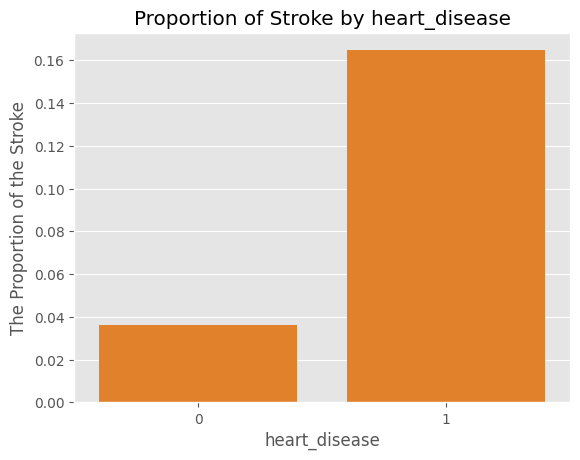

In [ ]:
# I create a bar plot for Stroke and heart_disease proportions
sns.barplot(x='heart_disease', y=1, data=heart_disease_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('heart_disease')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by heart_disease')
plt.show()

###4.2.4.Marital status vs Stroke

In [ ]:
# Calculate the proportion of strokes for each ever_married for better understanding
ever_married_proportion = df.groupby('ever_married')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to ever_married
print("Proportion of the strokes with respect to ever_married")
display(ever_married_proportion)

Proportion of the strokes with respect to ever_married


stroke,0,1
ever_married,,
No,0.986510,0.013490
Yes,0.941948,0.058052


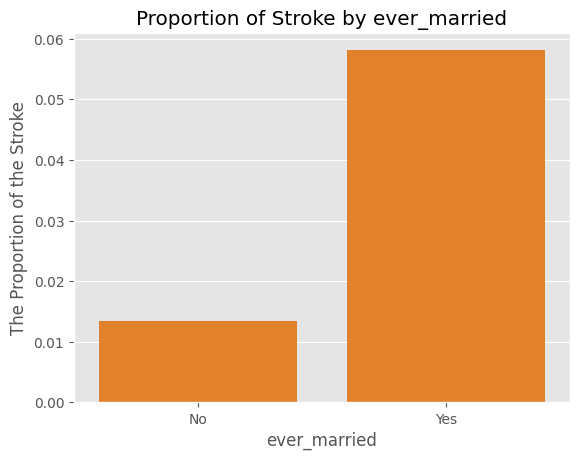

In [ ]:
# I create a bar plot for Stroke and ever_married proportions
sns.barplot(x='ever_married', y=1, data=ever_married_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('ever_married')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by ever_married')
plt.show()

###4.2.5.Work type vs Stroke

In [ ]:
# Calculate the proportion of strokes for each work_type for better understanding
work_type_proportion = df.groupby('work_type')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to work_type
print("Proportion of the strokes with respect to work_type")
display(work_type_proportion)

Proportion of the strokes with respect to work_type


stroke,0,1
work_type,,
Govt_job,0.955556,0.044444
Never_worked,1.000000,NaN
Private,0.954820,0.045180
Self-employed,0.931613,0.068387
children,0.998510,0.001490


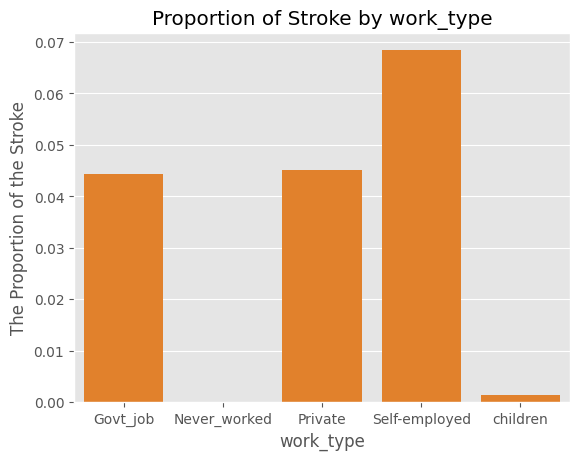

In [ ]:
# I create a bar plot for Stroke and work_type proportions
sns.barplot(x='work_type', y=1, data=work_type_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('work_type')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by work_type')
plt.show()

###4.2.6.Residence ype vs Stroke

In [ ]:
# Calculate the proportion of strokes for each Residence_type for better understanding
Residence_type_proportion = df.groupby('Residence_type')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to Residence_type
print("Proportion of the strokes with respect to Residence_type")
display(Residence_type_proportion)

Proportion of the strokes with respect to Residence_type


stroke,0,1
Residence_type,,
Rural,0.958661,0.041339
Urban,0.956225,0.043775


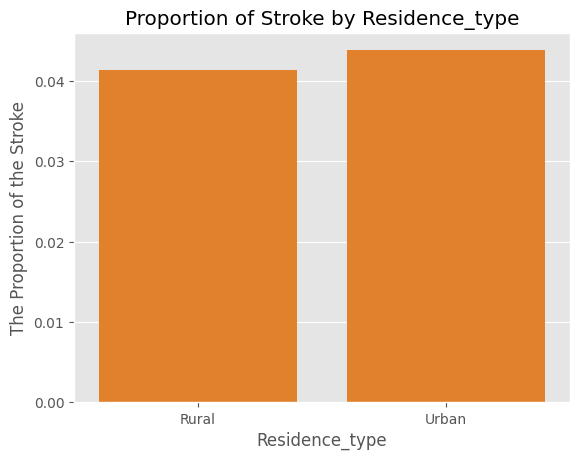

In [ ]:
# I create a bar plot for Stroke and Residence_type proportions
sns.barplot(x='Residence_type', y=1, data=Residence_type_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('Residence_type')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by Residence_type')
plt.show()

###4.2.7.Smoking vs Stroke


In [ ]:
# Calculate the proportion of strokes for each smoking_status	 for better understanding
smoking_status_proportion = df.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()
# display the calculated proportions with respect to smoking_status
print("Proportion of the strokes with respect to smoking_status	")
display(smoking_status_proportion)

Proportion of the strokes with respect to smoking_status	


stroke,0,1
smoking_status,,
Unknown,0.980445,0.019555
formerly smoked,0.931900,0.068100
never smoked,0.954644,0.045356
smokes,0.947083,0.052917


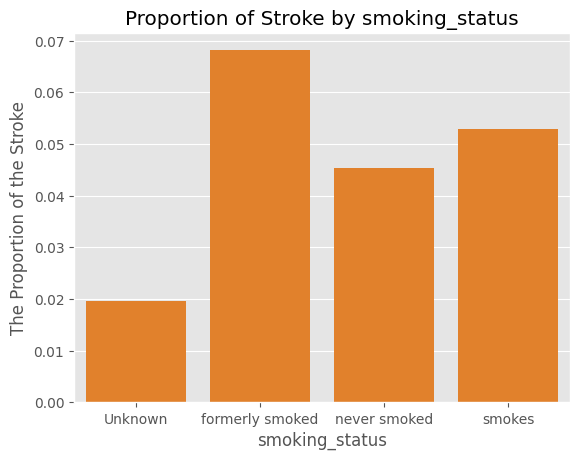

In [ ]:
# I create a bar plot for Stroke and smoking_status proportions
sns.barplot(x='smoking_status', y=1, data=smoking_status_proportion.reset_index(), color='#ff7f0e')
plt.xlabel('smoking_status')
plt.ylabel('The Proportion of the Stroke')
plt.title('Proportion of Stroke by smoking_status')
plt.show()

###4.2.8.Age vs. Stroke



<ipython-input-48-d13a851cfc0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='Set2')


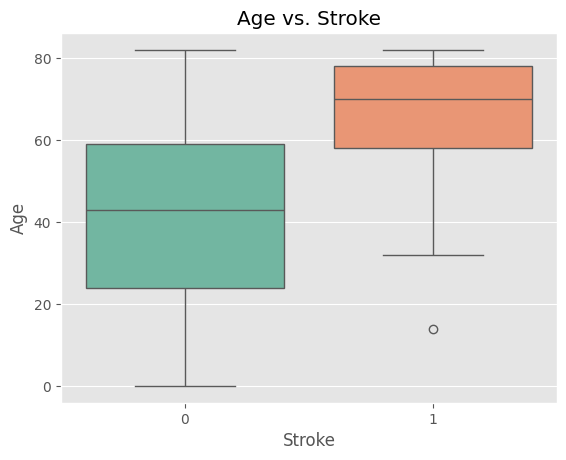

In [ ]:
# I create a box plot for Age and Stroke
sns.boxplot(x='stroke', y='age', data=df, palette='Set2')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age vs. Stroke')
plt.show()

###4.2.9.Diabetes vs Stroke



<ipython-input-49-f8912c1165e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')


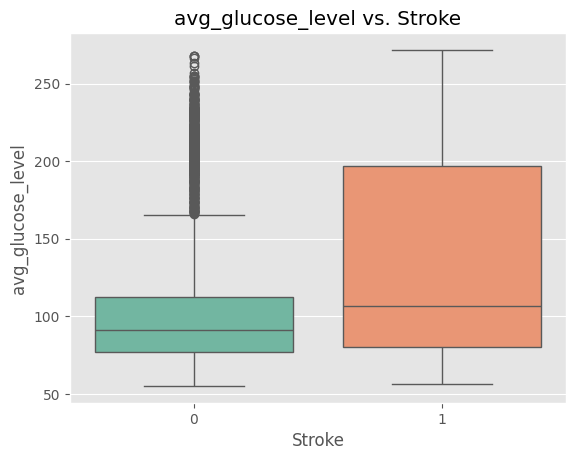

In [ ]:
# Create a box plot for avg_glucose_level and Stroke
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')
plt.xlabel('Stroke')
plt.ylabel('avg_glucose_level')
plt.title('avg_glucose_level vs. Stroke')
plt.show()

###4.2.10.Obesity vs stroke



<ipython-input-50-abfae3e00c53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette='Set2')


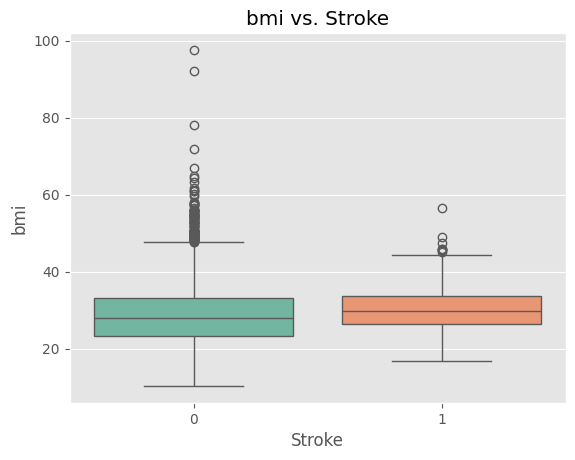

In [ ]:
# I create a box plot for bmi and Stroke
sns.boxplot(x='stroke', y='bmi', data=df, palette='Set2')
plt.xlabel('Stroke')
plt.ylabel('bmi')
plt.title('bmi vs. Stroke')
plt.show()

**Findings from Bivariate analysis**
- It is visible from `gender_proportion` dataframe that male is slightly more(5.1%) at the risk of stroke as compared to female(4.7%)
- It is visible from `hypertension_proportion` dataframe that hypertensive patients are slightly more at the risk of stroke(13.2%) as compared to non hypertensive(3.9%)
- It is visible from `heart_disease_proportion` dataframe that heart_disease patients are slightly more at the risk of stroke(17%) as compared to non heart_disease patients(3%)
- It is visible from `ever_married_proportion` dataframe that married patients are slightly more at the risk of stroke(6%) as compared to non heart_disease patients(1%)
- It is visible from `work_type_proportion` dataframe that self employed individuals are slightly more at the risk of stroke(7%) as compared to other work type individuals.Other higher proportion include in governmetaljobs and private individuals(4.5%). The unsual impact is of non workers which is quite contradictorary to medical sciences evidences.
- From `Residence_type_proportion` dataframe it can be conclude that both rural and urban areas residensies have almost same impact on stroke.
- It is visible from `smoking_status_proportion` dataframe that smokers and formerly smoker patients are slightly more at the risk of stroke(6%) as compared to non smoker patients(1%).
- `age` clearly indicates that the stroke patients are mostly aged persons.
- In `avg_gulucose_level` boxplot I can see that stroke  patients have mostly high level of blood gulocose suggesting diabettes leading to stroke.
In `bmi` boxplot I can see that the inter quartile range of stroke patientsis is slightly higher suggesting obesity leads to stroke.

##4.3.Multivariate analysis using pairplot and heatmap

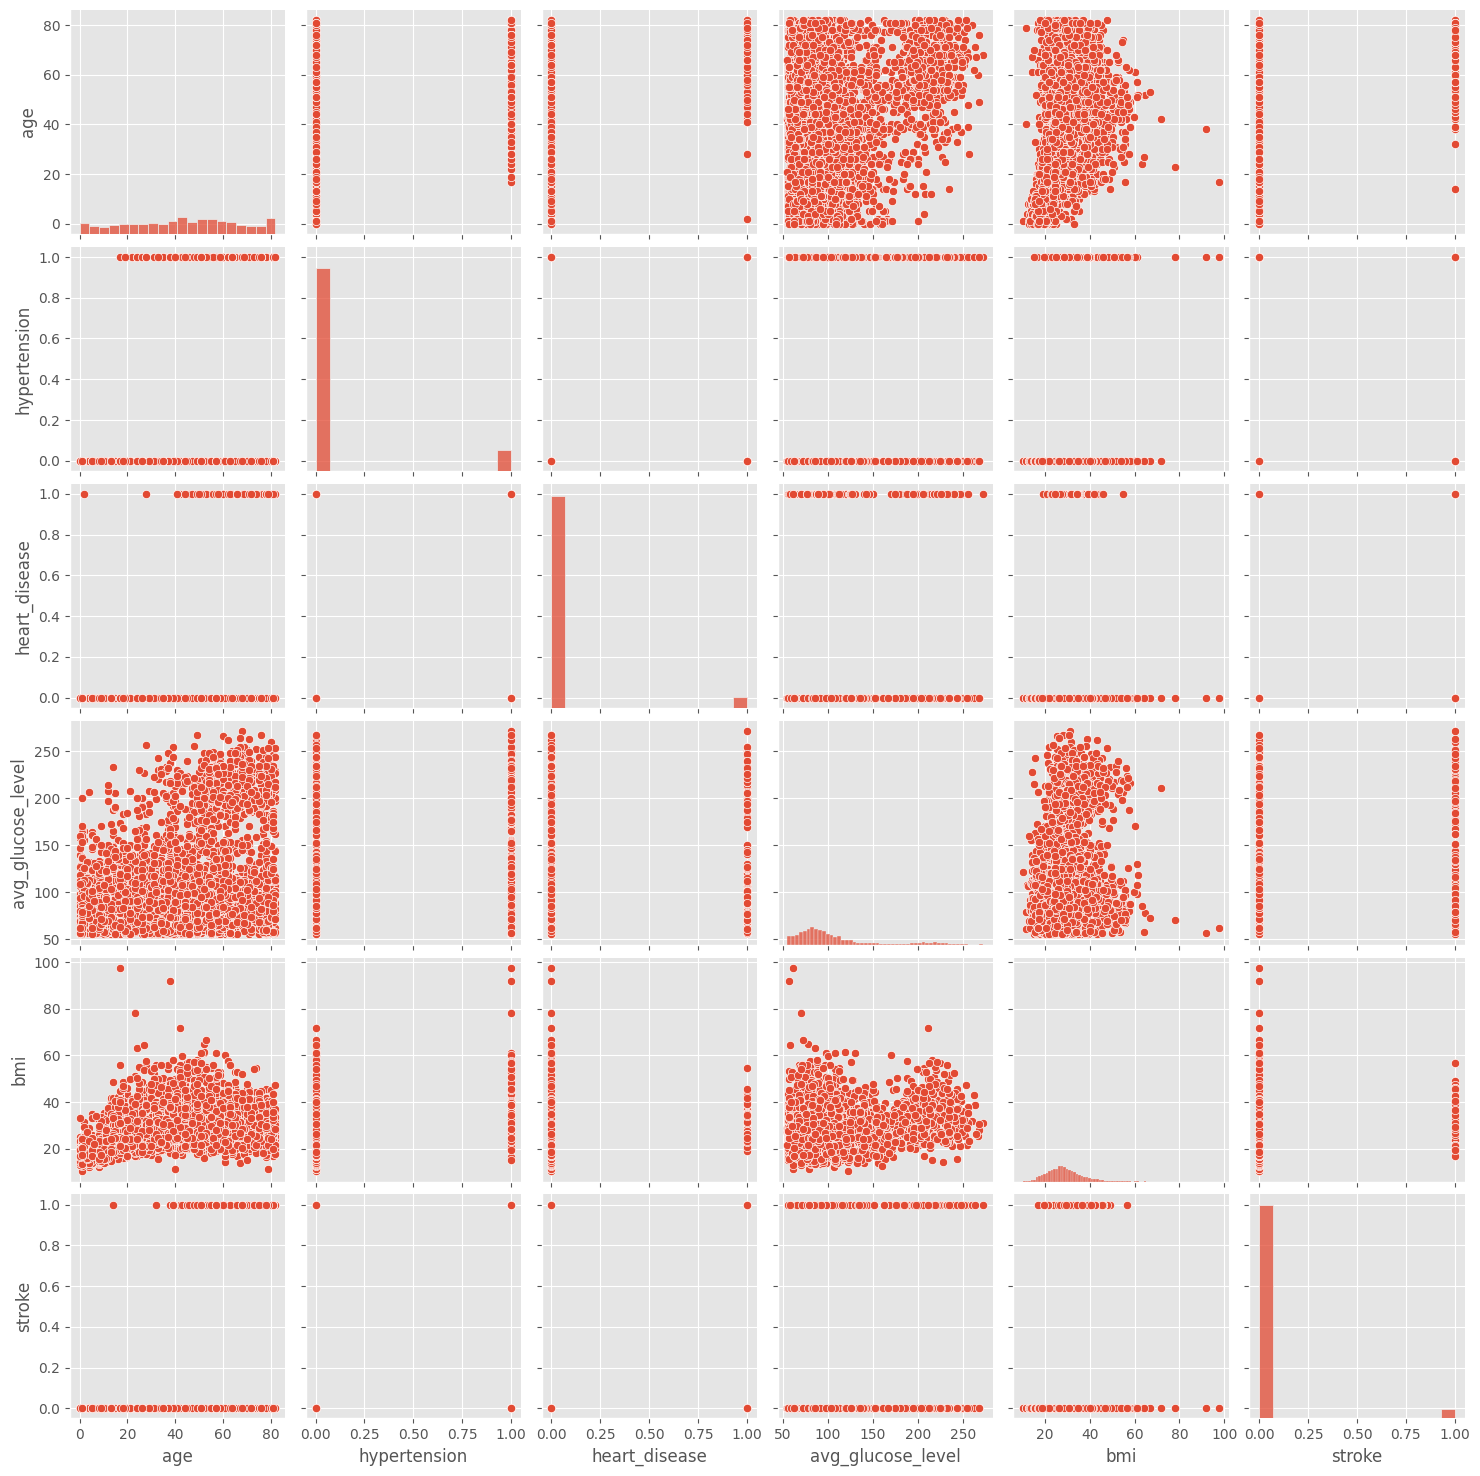

In [ ]:
# For numerical vs numerical variable analysis
sns.pairplot(df)

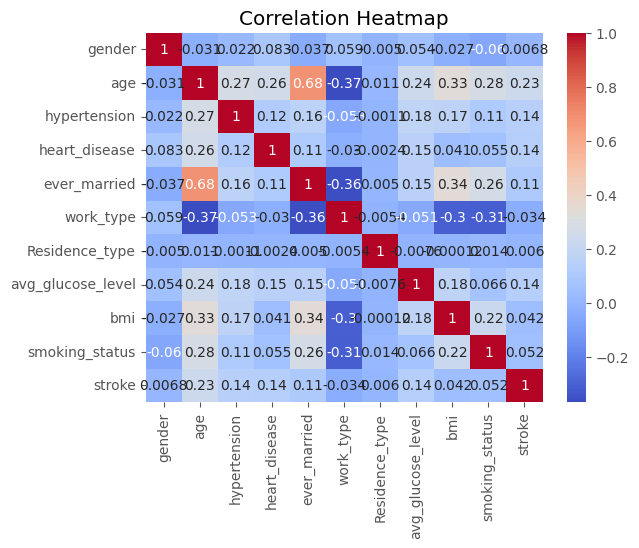

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
label_encoder = LabelEncoder()

for var in categorical_vars:
    df_encoded[var] = label_encoder.fit_transform(df_encoded[var])

# Plot heatmap
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()